In [130]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data
data= pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
corr=data.corr()

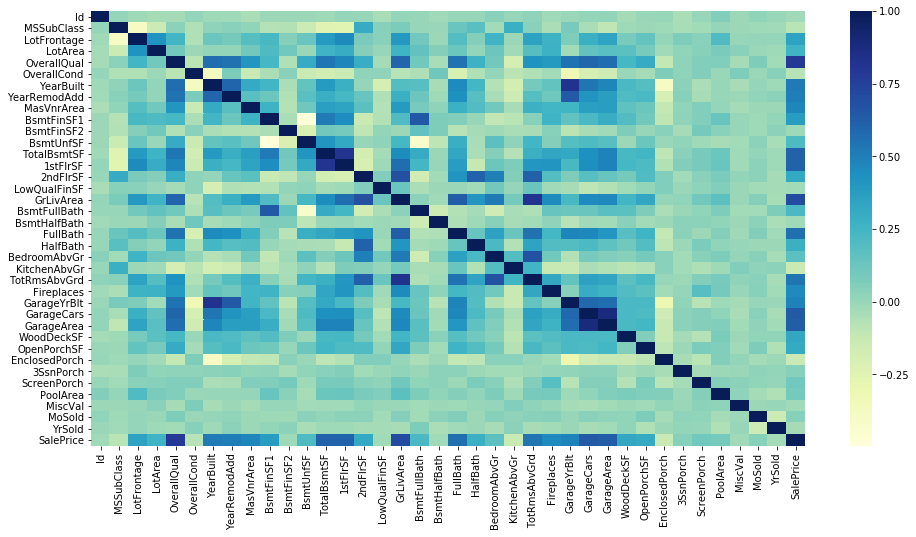

In [6]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

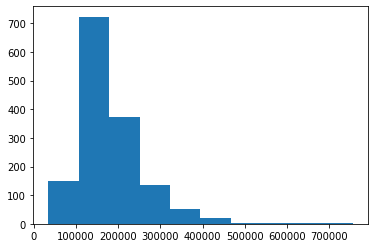

In [7]:
plt.hist(data.SalePrice)
plt.show()

## Handling null values

### Let's drop columns lots of with nulls on and don't add value to our data

We can drop FireplaceQu, PoolQC. Most of them do not have a value and the quality do not necessarily affects the price of the property. Also, there are very little values to use to impute the missing values. 

In [8]:
off=data[['FireplaceQu', 'PoolQC']]
off

,FireplaceQu,PoolQC
0,NaN,NaN
1,TA,NaN
2,TA,NaN
3,Gd,NaN
4,TA,NaN
...,...,...
1455,TA,NaN
1456,TA,NaN
1457,Gd,NaN
1458,NaN,NaN


In [9]:
data=data.drop(off, axis=1)


### Now let's look at Alley,  Fence, MiscFeature

These columns are missing many values, but there are important characteristic about the home that might influence the price of each home. <br>

Alley: Type of alley access to property<br>

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
<br>

In [10]:
data.Alley.astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
data['Alley']= data.Alley.fillna('None')

In [12]:
data.Alley.astype('category').value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

Fence: Fence quality<br>
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
<br>

In [13]:
data.Fence.astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [14]:
data['Fence']= data.Fence.fillna('None')

In [15]:
data.Fence.astype('category').value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

MiscFeature: Miscellaneous feature not covered in other categories <br>
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [16]:
data.MiscFeature.astype('category').value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [17]:
data['MiscFeature']= data.MiscFeature.fillna('None')

In [18]:
data.MiscFeature.astype('category').value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

### Now imputing values we don't know as 'Undisclosed', 'None or 0

LotFrontage: Linear feet of street connected to property <br>
We will replace the NaN values with 0

In [20]:
data['LotFrontage']= data.LotFrontage.fillna(0)

MasVnrType: Masonry veneer type <br>

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [21]:
data.MasVnrType.astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [22]:
data['MasVnrType']= data.MasVnrType.fillna('Undisclosed')

MasVnrArea: Masonry veneer area in square feet 

In [23]:
data['MasVnrArea']= data.MasVnrArea.fillna(0)

BsmtQual: Evaluates the height of the basement <br>

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [24]:
data.BsmtQual.astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [25]:
data['BsmtQual']= data.BsmtQual.fillna('Undisclosed')

BsmtCond: Evaluates the general condition of the basement <br>

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement 

In [26]:
data.BsmtCond.astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [27]:
data['BsmtCond']= data.BsmtCond.fillna('Undisclosed')

BsmtExposure: Refers to walkout or garden level walls <br>

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [28]:
data.BsmtExposure.astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [29]:
data['BsmtExposure']= data.BsmtExposure.fillna('Undisclosed')

BsmtFinType1: Rating of basement finished area <br>

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [30]:
data.BsmtFinType1.astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [31]:
data['BsmtFinType1']= data.BsmtFinType1.fillna('Undisclosed')

BsmtFinType2: Rating of basement finished area (if multiple types) <br>

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [32]:
data.BsmtFinType2.astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [33]:
data['BsmtFinType2']= data.BsmtFinType2.fillna('Undisclosed')

Electrical: Electrical system <br>

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [34]:
data.Electrical.astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
data['Electrical']= data.Electrical.fillna('Undisclosed')

GarageType: Garage location <br>
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [36]:
data.GarageType.astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [37]:
data['GarageType']= data.GarageType.fillna('Undisclosed')

GarageYrBlt: Year garage was built

In [38]:
data['GarageYrBlt']= data.GarageYrBlt.fillna('0')

GarageFinish: Interior finish of the garage <br>

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [39]:
data.GarageFinish.astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [40]:
data['GarageFinish']= data.GarageFinish.fillna('Undisclosed')

GarageQual: Garage quality <br>

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [41]:
data.GarageQual.astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [42]:
data['GarageQual']= data.GarageQual.fillna('Undisclosed')

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [43]:
data.GarageCond.astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [44]:
data['GarageCond']= data.GarageCond.fillna('Undisclosed')

In [45]:
#Set to display all rows
pd.set_option('display.max_rows', None)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [47]:
data.shape

(1460, 79)

In [48]:
data=data.drop('Id',axis=1)

### Data description 

In [49]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
data['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

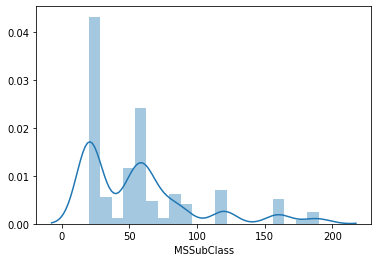

In [51]:
sns.distplot(data.MSSubClass)
plt.show()

Looks like most properties are 1946 or newer, 1 to 2 story homes.

OverallQual: Rates the overall material and finish of the house <br>
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [52]:
data['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

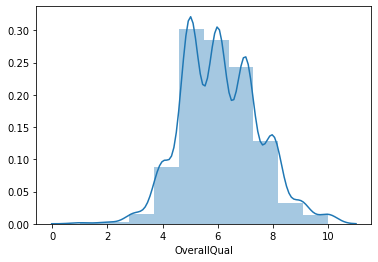

In [53]:
sns.distplot(data.OverallQual, bins=10)
plt.show()

In [54]:
data['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

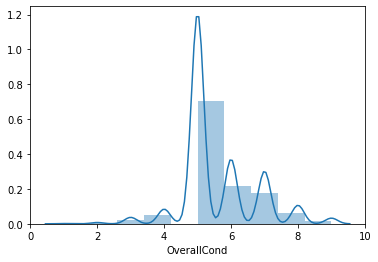

In [55]:
sns.distplot(data.OverallCond, bins=10)
plt.show()

For Overall quality and overall condition, most of the houses were on average to very good condition.

### Dealing with Year columns

We are going to use the Year data as categorical data. <br>
YearBuilt: Original construction date <br>
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)<br>
GarageYrBlt: Year garage was built <br>
YrSold: Year Sold (YYYY)


In [56]:
data['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

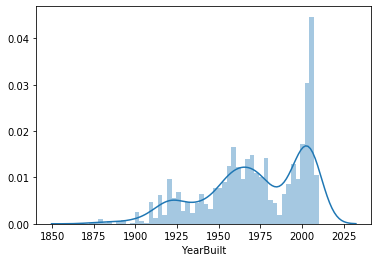

In [57]:
sns.distplot(data.YearBuilt, bins=50)
plt.show()

Too many dates. We are going to create buckets for the years. By research, construction styles changes were more noticeable in 1900, 1940, 1960 and 2000s. 

In [58]:
a= [(data.YearBuilt<=1900) , 
    (data.YearBuilt>=1901) & (data.YearBuilt<=1940),
    (data.YearBuilt>=1941) & (data.YearBuilt<=1960),
    (data.YearBuilt>=1961) & (data.YearBuilt<=2000),
    (data.YearBuilt>=2001)]
b= ['Before 1900','1901-1940', '1941-1960','1961-2000', 'After 2000']    

In [59]:
data['House_Era'] =  np.select(a,b)

In [60]:
data.House_Era.value_counts()

1961-2000      594
After 2000     364
1941-1960      245
1901-1940      232
Before 1900     25
Name: House_Era, dtype: int64

Let's create a binary column using  YearRemodAdd and YearBuilt to see if the property was remodeled. 

In [61]:
c= [((data.YearRemodAdd - data.YearBuilt)==0),
     ((data.YearRemodAdd - data.YearBuilt)>0)]
d=['No','Yes']

In [62]:
data['Remodeled'] = np.select(c,d)

Let's find out if a garage was added later.

In [63]:
data['GarageYrBlt']= data.GarageYrBlt.astype(int)

In [64]:
e= [((data.GarageYrBlt - data.YearBuilt)==0),
     ((data.GarageYrBlt - data.YearBuilt)>0)]
f=['No','Yes']

In [65]:
data['Garage_added']= np.select(e,f)

Let's find out the age of the house at time of sale.

In [66]:
data['Age_Of House'] = data['YrSold'] - data['YearBuilt']

### Convert Month sold number to month

In [67]:
import calendar
data['MoSold']=data.MoSold.apply(lambda x: calendar.month_abbr[x])

In [68]:
#Let's look at data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

### Split Data

In [69]:
X=data.loc[:,['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition','House_Era',
       'Remodeled', 'Garage_added', 'Age_Of House']]
y= data.loc[:,['SalePrice']]

### Binary Mapping

In [70]:
varlist =  ['Remodeled', 'Garage_added']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
X[varlist] = X[varlist].apply(binary_map)

### Create Dummies

In [71]:
categorical= X[['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'House_Era']]

In [72]:
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_Era_1941-1960,House_Era_1961-2000,House_Era_After 2000,House_Era_Before 1900
0,60,7,5,2003,2003,2003,2008,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,20,6,8,1976,1976,1976,2007,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,60,7,5,2001,2002,2001,2008,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,70,7,5,1915,1970,1998,2006,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,60,8,5,2000,2000,2000,2008,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [73]:
X= pd.concat([X,dummies],axis=1)

In [74]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_Era_1941-1960,House_Era_1961-2000,House_Era_After 2000,House_Era_Before 1900
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,1,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,1,0,0,0,1,0,0,1,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,1,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,1,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,1,0,0,0,1,0,0,1,0,0


In [75]:
X= X.drop(list(categorical.columns), axis=1)

In [76]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_Era_1941-1960,House_Era_1961-2000,House_Era_After 2000,House_Era_Before 1900
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,1,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,0,0,0,1,0,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,0,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,0,0,0,1,0,0,1,0,0


## scaling the features with Scaler

In [77]:
# scaling the features with Scaler

#from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
#cols = X.columns
#X = pd.DataFrame(scale(X))
#X.columns = cols
#X.columns

In [78]:
#Checking for Nans an inf values
#np.any(np.isnan(X))

In [79]:
#X= X.fillna(X.mean())

In [80]:
#X.shape

## scaling the features with MinMaxScaler

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [82]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
Xnum_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'Age_Of House']
X[Xnum_vars] = scaler.fit_transform(X[Xnum_vars])
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_Era_1941-1960,House_Era_1961-2000,House_Era_After 2000,House_Era_Before 1900
0,0.207668,0.033420,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,...,1,0,0,0,1,0,0,0,1,0
1,0.255591,0.038795,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,...,1,0,0,0,1,0,0,1,0,0
2,0.217252,0.046507,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,...,1,0,0,0,1,0,0,0,1,0
3,0.191693,0.038561,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.268371,0.060576,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,...,1,0,0,0,1,0,0,1,0,0


In [83]:
ynum_vars = ['SalePrice']
y[ynum_vars] = scaler.fit_transform(y[ynum_vars])
y.head()

,SalePrice
0,0.241078
1,0.203583
2,0.261908
3,0.145952
4,0.298709


In [84]:
#Checking for Nans an inf values
np.any(np.isnan(X))

True

In [85]:
X= X.fillna(X.mean())

In [86]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Ridge and Lasso Regression

In [89]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [90]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015001,0.006449,0.003349,0.001087,0.0001,{'alpha': 0.0001},-0.027158,-0.029521,-0.029771,-0.032029,...,-0.029299,0.001670,12,-0.016878,-0.016789,-0.017190,-0.017389,-0.016918,-0.017033,0.000223
1,0.009551,0.001351,0.001976,0.000053,0.001,{'alpha': 0.001},-0.027087,-0.029516,-0.029736,-0.031832,...,-0.029253,0.001611,11,-0.016885,-0.016789,-0.017180,-0.017385,-0.016924,-0.017033,0.000218
2,0.010356,0.002286,0.002773,0.000482,0.01,{'alpha': 0.01},-0.026749,-0.029440,-0.029770,-0.030395,...,-0.029063,0.001249,10,-0.017094,-0.016791,-0.017332,-0.017526,-0.017129,-0.017174,0.000247
3,0.008851,0.001198,0.002081,0.000357,0.05,{'alpha': 0.05},-0.027389,-0.029215,-0.030475,-0.028255,...,-0.029376,0.001497,13,-0.018306,-0.016834,-0.018273,-0.018529,-0.018327,-0.018054,0.000616
4,0.007840,0.000102,0.001932,0.000035,0.1,{'alpha': 0.1},-0.028067,-0.029125,-0.030824,-0.027875,...,-0.029733,0.001848,19,-0.019174,-0.016895,-0.019026,-0.019455,-0.019172,-0.018745,0.000935


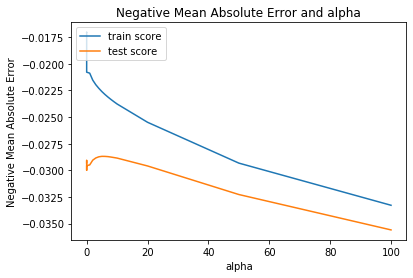

In [91]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [145]:
alpha = 1
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)
ridge1.coef_

array([[-1.65046268e-02,  6.49410217e-02,  4.17667512e-02,
         2.40231959e-02,  8.85225434e-03,  1.89508546e-02,
         3.15719046e-02,  1.10118410e-01,  1.24182838e-01,
        -8.41583773e-03,  1.37814570e-01,  2.56625061e-02,
         4.54981759e-03,  3.70082655e-02,  3.43020461e-03,
        -9.45980924e-03, -4.21945120e-02,  3.08858709e-02,
         1.79818629e-02,  5.56703151e-02,  9.15823127e-04,
         1.66875142e-02,  2.29115210e-03, -1.47146295e-03,
         2.61398087e-02,  1.47579454e-02,  6.60799636e-03,
         3.38167661e-03,  9.72015449e-03,  2.83525761e-04,
        -3.47806873e-02,  2.09628238e-02,  3.13096996e-02,
         3.16744459e-02,  3.14084580e-02,  2.30611575e-03,
        -2.26515218e-03,  7.90728403e-04,  3.07147337e-03,
        -2.69347343e-02,  3.41534334e-03,  2.84176543e-02,
         2.20543021e-02,  2.47592088e-02, -1.48800721e-02,
         1.70830034e-02, -1.85208089e-02, -9.51432117e-03,
        -3.18015145e-03,  4.05810571e-03,  9.09299571e-0

In [146]:
pred1 = ridge1.predict(X_test)# Use this model to predict the test data

In [147]:
print(mean_squared_error(y_test, pred1))

0.0018271455494158267


In [161]:
alpha = 3
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
ridge2.coef_

array([[-9.06515035e-03,  3.66863818e-02,  3.78225921e-02,
         2.15464126e-02,  1.05737798e-02,  2.32096239e-02,
         3.13275590e-02,  7.44238402e-02,  9.54659684e-02,
        -7.35767539e-03,  9.74505896e-02,  2.51176586e-02,
         2.94157002e-03,  4.36510263e-02,  1.00800589e-02,
         1.38292364e-03, -2.98734949e-02,  4.13989446e-02,
         2.46185906e-02,  4.69669341e-02,  1.95222712e-02,
         1.98483224e-02,  2.55907004e-03, -4.69814288e-04,
         1.97491950e-02,  1.13767432e-02,  8.27250378e-03,
         1.64815442e-03,  1.05678593e-02, -3.49044485e-04,
        -2.00695773e-02,  1.00059693e-02,  1.77586428e-02,
         1.90152581e-02,  1.68483974e-02,  1.92728169e-03,
        -1.06689956e-03,  2.82328729e-03,  4.39617111e-03,
        -1.91832422e-02,  2.11585073e-03,  2.53081478e-02,
         1.95036031e-02,  2.30770109e-02, -7.31862238e-03,
         1.70713708e-02, -1.81845430e-02, -6.60742464e-03,
        -3.47925599e-03,  5.28949860e-03,  7.13256892e-0

In [162]:
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, pred2))

0.0017861212422101238


In [143]:
alpha = 5
ridge3 = Ridge(alpha=alpha)

ridge3.fit(X_train, y_train)
ridge3.coef_

array([[-4.21615590e-03,  2.74479185e-02,  3.54952202e-02,
         1.98696632e-02,  9.90903390e-03,  2.41603534e-02,
         2.99818135e-02,  6.18870974e-02,  8.04657817e-02,
        -5.89019779e-03,  8.14801463e-02,  2.36671068e-02,
         2.03304383e-03,  4.46649481e-02,  1.28027928e-02,
         5.93152629e-03, -2.33666853e-02,  4.31746771e-02,
         2.79834719e-02,  4.37552649e-02,  2.55835527e-02,
         2.05608319e-02,  3.89804858e-03,  1.25596724e-04,
         1.57355306e-02,  9.60737645e-03,  7.56246956e-03,
         9.73451608e-04,  1.10980874e-02, -4.21290841e-04,
        -1.60896076e-02,  7.30199751e-03,  1.27653487e-02,
         1.49437503e-02,  1.04958001e-02,  2.64079341e-03,
        -4.14621106e-04,  3.29384564e-03,  4.49661112e-03,
        -1.52744092e-02,  1.14602577e-03,  2.17975736e-02,
         1.67571871e-02,  2.07601945e-02, -4.98893702e-03,
         1.68996601e-02, -1.71907306e-02, -4.99733339e-03,
        -3.52540248e-03,  5.69124504e-03,  5.24202026e-0

In [144]:
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, pred3))

0.0018021890993030344


In [148]:
alpha = 3.5
ridge4 = Ridge(alpha=alpha)

ridge4.fit(X_train, y_train)
ridge4.coef_

array([[-7.63747605e-03,  3.36473723e-02,  3.71708574e-02,
         2.10764610e-02,  1.04575956e-02,  2.35685506e-02,
         3.10026474e-02,  7.03770103e-02,  9.09357500e-02,
        -6.97615625e-03,  9.24067395e-02,  2.47669766e-02,
         2.67571341e-03,  4.41386197e-02,  1.09479520e-02,
         2.84669720e-03, -2.78971289e-02,  4.21598107e-02,
         2.56303501e-02,  4.59327180e-02,  2.15967439e-02,
         2.01357114e-02,  2.88937982e-03, -2.93080092e-04,
         1.85633515e-02,  1.08348742e-02,  8.13896999e-03,
         1.44399536e-03,  1.07192631e-02, -3.90112167e-04,
        -1.87035727e-02,  9.03471178e-03,  1.61453943e-02,
         1.76419572e-02,  1.48727160e-02,  2.13482160e-03,
        -8.69324927e-04,  3.01120709e-03,  4.46286358e-03,
        -1.80066892e-02,  1.84781418e-03,  2.43663881e-02,
         1.87594034e-02,  2.24738693e-02, -6.53158405e-03,
         1.70392352e-02, -1.79463657e-02, -6.10233446e-03,
        -3.49941975e-03,  5.42889328e-03,  6.58194533e-0

In [150]:
pred4 = ridge4.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, pred4))

0.0017880661399273536


In [165]:
alpha = 3.001
ridge5 = Ridge(alpha=alpha)

ridge5.fit(X_train, y_train)
ridge5.coef_

array([[-9.06212357e-03,  3.66795701e-02,  3.78212231e-02,
         2.15454334e-02,  1.05736162e-02,  2.32104661e-02,
         3.13269370e-02,  7.44148325e-02,  9.54562157e-02,
        -7.35691594e-03,  9.74394819e-02,  2.51169804e-02,
         2.94100554e-03,  4.36522356e-02,  1.00819705e-02,
         1.38615189e-03, -2.98692333e-02,  4.14007982e-02,
         2.46207658e-02,  4.69646298e-02,  1.95269680e-02,
         1.98490034e-02,  2.55970714e-03, -4.69438988e-04,
         1.97466740e-02,  1.13755723e-02,  8.27230609e-03,
         1.64771464e-03,  1.05681782e-02, -3.49149685e-04,
        -2.00664525e-02,  1.00037143e-02,  1.77550584e-02,
         1.90121580e-02,  1.68440813e-02,  1.92770259e-03,
        -1.06647410e-03,  2.82373272e-03,  4.39634983e-03,
        -1.91807083e-02,  2.11529426e-03,  2.53062343e-02,
         1.95020856e-02,  2.30758018e-02, -7.31683947e-03,
         1.70713146e-02, -1.81840848e-02, -6.60632612e-03,
        -3.47930577e-03,  5.28981413e-03,  7.13141391e-0

In [166]:
pred5 = ridge5.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, pred5))

0.001786123042196561


The optimal alpha is 3. Let's double it.

In [210]:
alpha = 6
ridgex2 = Ridge(alpha=alpha)

ridgex2.fit(X_train, y_train)
ridgex2.coef_

array([[-2.47689127e-03,  2.47048673e-02,  3.45324371e-02,
         1.91981610e-02,  9.50475833e-03,  2.43285601e-02,
         2.93283062e-02,  5.79773178e-02,  7.52301423e-02,
        -5.25581853e-03,  7.63016327e-02,  2.29512169e-02,
         1.69950353e-03,  4.45804024e-02,  1.36480221e-02,
         7.29586833e-03, -2.11279452e-02,  4.32944749e-02,
         2.91619872e-02,  4.27253707e-02,  2.71541556e-02,
         2.06307492e-02,  4.51417378e-03,  3.32459786e-04,
         1.42937764e-02,  9.01285448e-03,  7.16794259e-03,
         7.43071943e-04,  1.13056182e-02, -3.99581936e-04,
        -1.49974585e-02,  6.65688142e-03,  1.12297432e-02,
         1.38259742e-02,  8.38710013e-03,  2.86588894e-03,
        -1.88779011e-04,  3.35099705e-03,  4.45254892e-03,
        -1.38931296e-02,  7.43543713e-04,  2.03151639e-02,
         1.56234904e-02,  1.97308664e-02, -4.33835716e-03,
         1.67771169e-02, -1.66949061e-02, -4.48843945e-03,
        -3.52926126e-03,  5.78577081e-03,  4.56278067e-0

In [211]:
predx2 = ridgex2.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, predx2))

0.0018155246901181226


## Lasso

In [169]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [178]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065351,0.015324,0.002522,0.000624,0.0001,{'alpha': 0.0001},-0.024676,-0.027804,-0.030492,-0.025080,...,-0.027084,0.002099,1,-0.022117,-0.018986,-0.021516,-0.022326,-0.022337,-0.021456,0.001271
1,0.010725,0.000563,0.002086,0.000131,0.001,{'alpha': 0.001},-0.027458,-0.035482,-0.033767,-0.030118,...,-0.032007,0.002864,2,-0.030351,-0.028714,-0.028934,-0.029993,-0.030352,-0.029669,0.000706
2,0.007474,0.000161,0.001955,0.000062,0.01,{'alpha': 0.01},-0.054742,-0.060942,-0.058535,-0.051584,...,-0.057467,0.003792,3,-0.057742,-0.055420,-0.056559,-0.057565,-0.056581,-0.056773,0.000834
3,0.006006,0.000090,0.001955,0.000097,0.05,{'alpha': 0.05},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
4,0.007261,0.001183,0.002366,0.000620,0.1,{'alpha': 0.1},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890


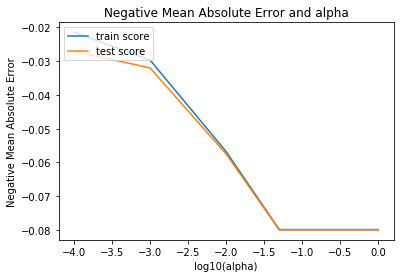

In [188]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [189]:
alpha =-3

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=-3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [190]:
lasso.coef_

array([ 3.72586165e+03, -9.02406975e+03, -2.54547774e+03,  8.06009992e+05,
        2.13422432e+05,  3.32290331e+05, -8.68126811e+05,  5.16557740e+05,
        2.38307665e+05,  6.72709595e+04, -6.19907317e+05, -1.67284226e+03,
       -1.65600460e+03, -1.59893184e+03, -1.84389663e+03, -4.37047638e+03,
        1.39669173e+04,  2.24022041e+03, -1.12853100e+03, -9.30411491e+02,
        1.19587942e+03,  7.85527927e+02,  6.46598269e+02, -7.12854983e+02,
       -4.85600949e+03, -1.62009310e+03,  1.13676128e+04,  2.19425382e+05,
       -1.18854447e+02, -5.06743261e+02, -1.26556243e+04, -3.34414993e+03,
       -2.23078201e+03, -2.73147831e+03, -5.31591495e+03, -1.26970363e+04,
       -1.35456917e+03, -1.52425071e+03,  6.74133016e+02,  3.77687775e+03,
        1.78827713e+02, -2.60627620e+03, -2.48562177e+03, -1.18461808e+03,
        1.50960279e+04,  5.73894802e+02,  3.84372991e+02, -3.38387082e+03,
        6.48916372e+01,  7.72415470e+02, -4.31475081e+02,  1.96151081e+04,
        1.15981764e+04,  

In [191]:
pred = lasso.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, pred))

168506587576.35117


## Elastic Net

In [99]:
elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [100]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.115884,0.031810,0.002594,0.000884,0.0001,{'alpha': 0.0001},-0.025713,-0.027929,-0.030112,-0.025746,...,-0.027904,0.001943,1,-0.020938,-0.018127,-0.020635,-0.021035,-0.021457,-0.020438,0.001185
1,0.022070,0.001991,0.002110,0.000268,0.001,{'alpha': 0.001},-0.024617,-0.031388,-0.030766,-0.027019,...,-0.028588,0.002498,2,-0.026596,-0.024340,-0.025055,-0.026478,-0.026629,-0.025820,0.000945
2,0.012634,0.002441,0.003013,0.001032,0.01,{'alpha': 0.01},-0.043294,-0.051605,-0.046937,-0.042459,...,-0.047083,0.003812,3,-0.047211,-0.045377,-0.045719,-0.046900,-0.046171,-0.046276,0.000692
3,0.007400,0.001209,0.002816,0.000429,0.05,{'alpha': 0.05},-0.072985,-0.077280,-0.071154,-0.067498,...,-0.073244,0.003747,4,-0.073621,-0.072232,-0.072946,-0.074050,-0.072596,-0.073089,0.000664
4,0.008084,0.001247,0.002706,0.000524,0.1,{'alpha': 0.1},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,5,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890


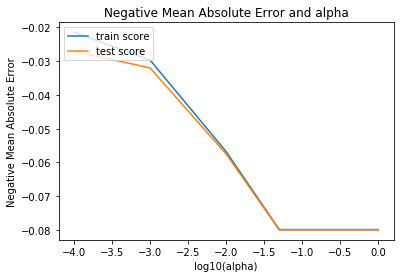

In [200]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [194]:
alpha = -3

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=-3, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [195]:
elasticnet.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Forward Feature election

In [196]:
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + np.log(n) * num_params
    return bic

In [208]:
features = X_train.columns

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 33, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GrLivArea'] 
AIC:  -5264.616521384639 
BIC:  -5254.759445748309
Selected features:  ['GrLivArea', 'Age_Of House'] 
AIC:  -5601.150722399549 
BIC:  -5591.293646763219
Selected features:  ['GrLivArea', 'Age_Of House', 'TotalBsmtSF'] 
AIC:  -5769.453648791345 
BIC:  -5759.596573155015
Selected features:  ['GrLivArea', 'Age_Of House', 'TotalBsmtSF', 'Neighborhood_NridgHt'] 
AIC:  -5875.1446207141 
BIC:  -5865.28754507777
Selected features:  ['GrLivArea', 'Age_Of House', 'TotalBsmtSF', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr'] 
AIC:  -5989.293923651674 
BIC:  -5979.436848015344
Selected features:  ['GrLivArea', 'Age_Of House', 'TotalBsmtSF', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'GarageCars'] 
AIC:  -6047.377564489746 
BIC:  -6037.520488853416
Selected features:  ['GrLivArea', 'Age_Of House', 'TotalBsmtSF', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'GarageCars', 'BsmtFinSF1'] 
AIC:  -6099.025817724632 
BIC:  -6089.168742088303
Selected features:  

Selected features:  ['GrLivArea', 'Age_Of House', 'TotalBsmtSF', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'GarageCars', 'BsmtFinSF1', 'KitchenQual_TA', 'KitchenQual_Gd', 'KitchenQual_Fa', 'BldgType_TwnhsE', 'Neighborhood_Crawfor', 'KitchenAbvGr', 'SaleType_New', 'SaleCondition_Normal', 'LotShape_IR2', 'MasVnrArea', 'ScreenPorch', 'Functional_Typ', 'RoofStyle_Gable', 'BedroomAbvGr', 'WoodDeckSF', 'ExterQual_TA', 'BsmtExposure_Gd', 'Street_Pave', 'TotRmsAbvGrd', 'MSZoning_FV', 'Fireplaces'] 
AIC:  -6585.986521721486 
BIC:  -6576.129446085156
Selected features:  ['GrLivArea', 'Age_Of House', 'TotalBsmtSF', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'GarageCars', 'BsmtFinSF1', 'KitchenQual_TA', 'KitchenQual_Gd', 'KitchenQual_Fa', 'BldgType_TwnhsE', 'Neighborhood_Crawfor', 'KitchenAbvGr', 'SaleType_New', 'SaleCondition_Normal', 'LotShape_IR2', 'MasVnrArea', 'ScreenPorch', 'Functional_Typ', 'RoofStyle_Gable', 'BedroomAbvGr', 'WoodDeckSF', 'ExterQual_TA', 'BsmtExposure_Gd', 'Stree

In [209]:
regression.coef_

array([[ 3.99821601e-01, -6.99379815e-02,  8.95710220e-02,
         4.11172125e-02,  5.34896041e-02,  7.45728981e-02,
         5.33017932e-02, -7.23722058e-02, -6.04749597e-02,
        -7.33236947e-02, -2.91079728e-02,  4.70501038e-02,
        -1.24128179e-01,  1.86910942e-02,  1.01201770e-02,
         1.16310379e-02,  4.01910243e-02,  2.62951261e-02,
         2.93327543e-02, -7.87240224e-03, -2.67769176e-02,
         4.44085024e-02, -2.07867663e-02, -4.75198646e+12,
         4.66158657e-02,  1.99301926e-02,  1.74816233e-02,
         2.48017326e-02, -2.34885298e-02,  3.72393887e-02,
         4.75198646e+12,  4.69740648e-03,  9.38678808e-03]])

In [ ]:
##Got Stuck after Lasso...